In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def merge_beta (sumstat, polyfun):
    SNP = sumstat[sumstat.SNP.isin(polyfun.SNP)]
    check_size = pd.merge(SNP, polyfun[polyfun.SNP.isin(SNP.SNP)].loc[:,['SNP','BETA_MEAN']], on='SNP')
    check_size.rename(columns = {'BETA':'beta_sumstat', 'BETA_MEAN':'beta_polyfun'}, inplace = True)
    return(check_size)


In [86]:
## create scatter plot and box plot
p_threshold = [0.1,0.01, 0.001,5e-8]
def plot_beta(df, name):
    for i in p_threshold:
        df= df[df.P < i]
        plt.scatter(df.beta_sumstat, df.beta_polyfun, c='blue', alpha=0.3)
        plt.title(name + ' effect size comparison, p = ' + str(i))
        plt.xlabel("summary stat")
        plt.ylabel("polyfun")
        plt.show()
    df.boxplot(column=['beta_sumstat', 'beta_polyfun'])  

In [5]:
kunkle = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/fixed_alzheimers/processed/Kunkle_et_al_2019_hg37_ldsc.tsv', sep = '\t')
#kunkle_munged = pd.read_parquet('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/fixed_alzheimers/processed/kunkle_et_al_2021_hg37_ldsc.munged.parquet')
kunkle_polyfun = pd.read_csv('/gpfs/commons/home/tlin/output/kunkle/kunkle_fixed_0224/finemap/max_snp_10/aggregate.all.txt.gz', compression = 'gzip', sep = '\t')
merge_kunkle = merge_beta(kunkle,kunkle_polyfun)

In [6]:
bellenguez = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/fixed_alzheimers/processed/Bellenguez_et_al_2021_hg37_qc.tsv', sep = '\t')
bellenguez_polyfun = pd.read_csv('/gpfs/commons/home/tlin/output/bellenguez/bellenguez_fixed_0224/finemap/max_snp_10/sort_aggregate.all.txt', sep = '\t',
                                 names = ['CHR','SNP','BP','A1','A2','SNPVAR','N','Z','P','PIP','BETA_MEAN','BETA_SD','CREDIBLE_SET','start','end'],usecols = ['SNP','PIP','BETA_MEAN'])
bellenguez_polyfun.drop(bellenguez_polyfun.tail(1).index,inplace=True) ## because this one is sorted file, so col name is in the last row. 
merge_bellenguez = merge_beta(bellenguez,bellenguez_polyfun)
merge_bellenguez.beta_polyfun = merge_bellenguez.beta_polyfun.astype(float) ## because beta_polyfun was Object class. Changed it to float so we can plot its value. 

/nfs/sw/jupyter/jupyter3-4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
wightman = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/fixed_alzheimers/processed/Wightman_2021_hg37_withbeta.tsv', sep = '\t')
wightman_polyfun = pd.read_csv('/gpfs/commons/home/tlin/output/wightman/fixed_0224/finemap/max_snp_10/agg_fixed_converge.tsv.gz', compression = 'gzip', sep = '\t')
merge_wightman =  merge_beta(wightman,wightman_polyfun)

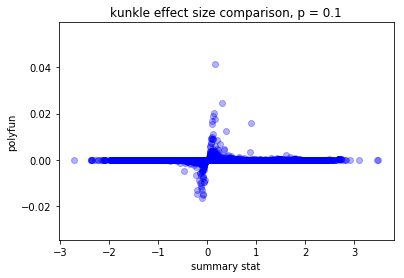

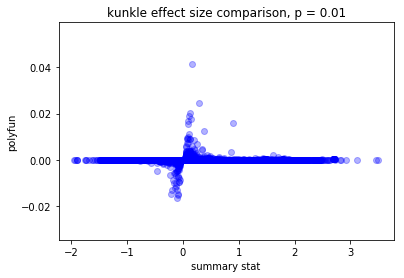

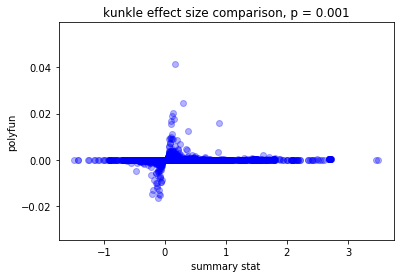

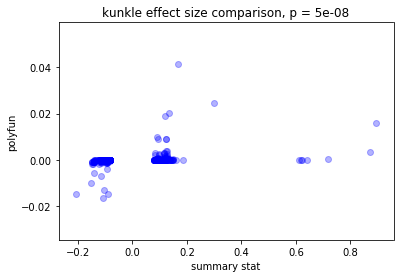

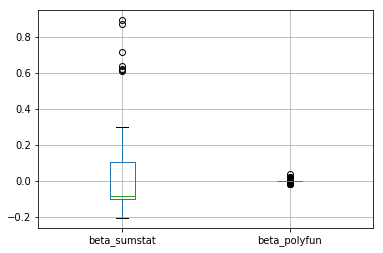

In [87]:
plot_beta(merge_kunkle, 'kunkle')

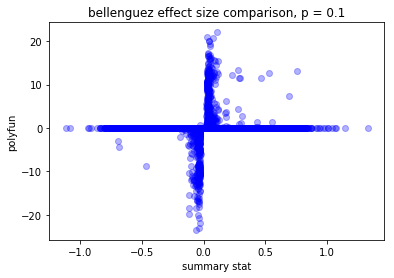

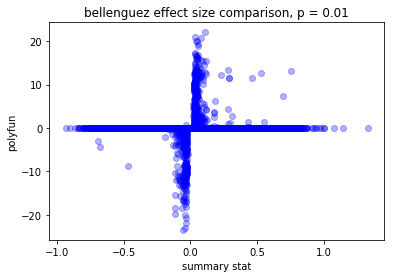

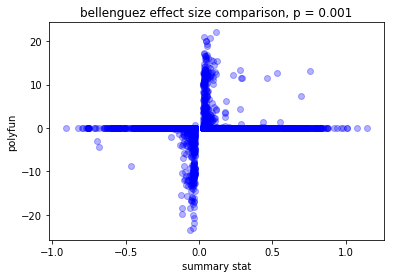

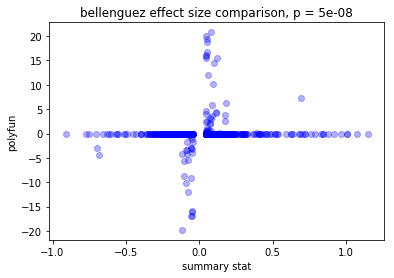

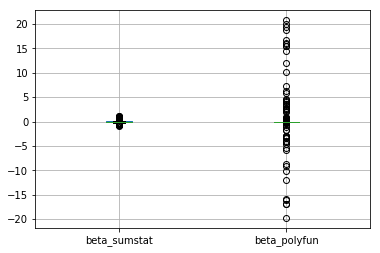

In [88]:
plot_beta(merge_bellenguez,'bellenguez')

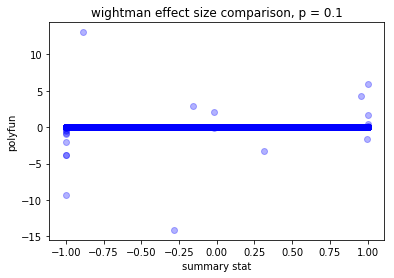

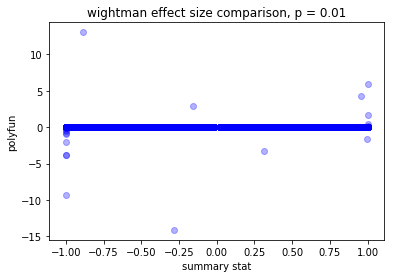

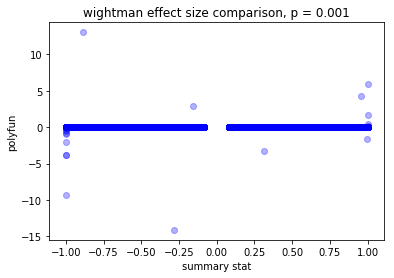

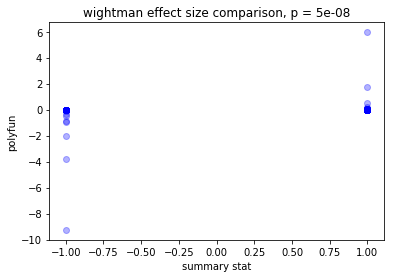

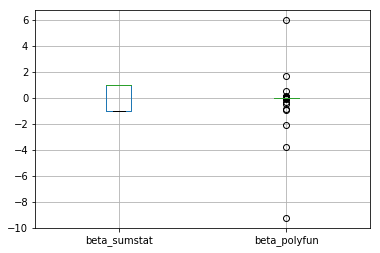

In [89]:
plot_beta(merge_wightman,'wightman')

In [14]:
wightman_bl_max10 = pd.read_csv('/gpfs/commons/home/tlin/output/wightman/fixed_0224_annotations/bl/max_snp_10/aggregate.all.txt.gz',compression='gzip', sep = '\t')

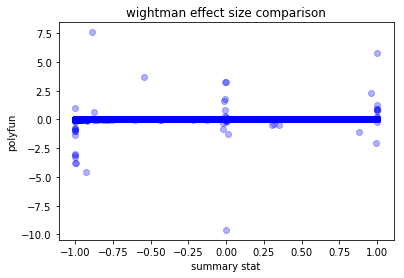

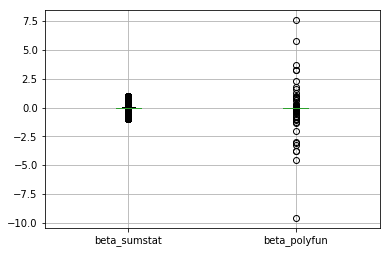

In [15]:
plot_beta(merge_beta(wightman, wightman_bl_max10) ,'wightman')  ## this one only has bl annotations. 